# Creating an Artificial Neural Network



### Motivation

Our problem we will try to solve is recognizing handwritten numbers. We will use the MNIST dataset. Some additional [info](http://yann.lecun.com/exdb/mnist/) about the data are accessible through the link. To allow easier access to [data](https://pjreddie.com/projects/mnist-in-csv/) available in  above git repository, it is also available as .csv files i

In [1]:
import numpy
import matplotlib.pyplot
%matplotlib inline

# open the CSV file and read its contents into a list
data_file = open("Week11_data_train100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

So, now we have all the entries in a list, let's take a look how many entries we have, and  which info we get from each element. Here, as an example, we look at the first element of the list:

In [2]:
print("The list contains {} entries".format(len(data_list)))
print(data_list[0])

The list contains 100 entries
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0

The first entry in this string is the number, the rest numbers are represecting the the picture in grayscale. 0 means 100% background, 255 is the most "ink" possible.
So let us split up the entry in the number and the data and print the image:

maximum value of pixel is 255.0
minimum value of pixel is 0.0
The picture shows a handwritten number 5


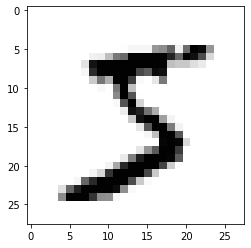

In [3]:
line_values = data_list[0].split(',')
number = line_values[0]
# converting to float type-array
pixel_array = numpy.asfarray(line_values[1:])   
# to check the minimun and maximum values of pixels
maximum = max(pixel_array[1:])
minimum = min(pixel_array[1:])
print('maximum value of pixel is', maximum)
print('minimum value of pixel is', minimum)
# make the array as a two dimensional array
picture_array = pixel_array.reshape((28,28))
# print the information
print(f"The picture shows a handwritten number {number}")
matplotlib.pyplot.imshow(picture_array, cmap='Greys', interpolation='None')

## 14.2 Creating a ANN

Even if we now want to solve the number recognition problem, let us step back and think about, how we can create a ANN, that can be used for distinguishing/predicting a handwritten number based on its pixel values.

Please note, we will use a lot of inheritance in the following steps , so the different parts can be explained individually as a deductive process. Usually it would be implemented in one single class.

### Structure

If we go back to the last weeks, our simple three layer ANN need the following parts:

* A way to define the size (number of nodes/neurons in each layer)
* A way to set the learning rate
* A way to set the initial weights (randomly)
* A way to define the activation function to be used
* A way to train the network
* A way to query the network (classifying unknown samples)

The first four bullet points can be part of the initialization, so the core of the structure could look like this:

In [4]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special

In [5]:
# class definition for the core structure
class neuralNetworkCore:
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        pass

    
    # query the neural network
    def query(self, inputs_list):
        pass

# Initialization

Our new class `neuralNetworkCore` is currently without any functionality. So let us start with the initialization in the `__init__( )` function. It should:

* Save the number of nodes in each layer
* Save the weight matrices and initialize them (remember week 9: rule of thumb is randomly between 0 and 1/(second root of the number of incomming connections))
* Save the learning rate
* Save/define the activation function

So we extend our `neuralNetworkCore` class and overwrite the `__init__( )` function to actually do something:

In [6]:
class neuralNetworkInit(neuralNetworkCore):
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # here we use sigmoid function as the activation function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass


Storing the number of nodes and the learning rates is just storing the parameters of the `__init__( )` function as object variables.

For creating the weight matrices, first let's take a look at the [documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). In each line we get from Numpy a two-dimensional array (size defined by the number of nodes involved in the two layers) with normal distributed numbers. Center of the normal distribution is 0 and the limits are the square root of the number of incomming links, positiv and negative.
Why also negativ numbers?  The sigmoid function is also defined for negative numbers, and a negative influence can help a ANN (tink about it like a boolean "not" function).
There is a tiny risk, that a weight get randomly assigned the exact value of zero, but it is so small, we didn't handle this corner case.

And for the activation function, we use a lambda function.

### Query

Our class/objects are now initialized correctly, but has no functionality.
Like in the lecture let us first talk about the query method. For the query we need to do:

* Make sure the inputs are in vector/matrix form
* Apply matrix multiplication and the activation function on both relevant layers (input -> hidden; hidden -> output)
* Return the output

So we extend the `neuralNetworkInit` class and overwrite the currently empty `query` function.

In [7]:
class neuralNetworkQuery(neuralNetworkInit):
    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

Most of the code is quite straightforward the math we know from the lecture. Calculation of the dot-product and applying activation function, repeated two times.
But the first command in this function, converting the inputs into a matrix that can be used for the dot product might not be clear. But it is relativly simple:

* The call to [numpy.arrray](https://numpy.org/doc/stable/reference/generated/numpy.array.html) converts the Python list into a numpy array object
* The parameter `ndmin=2` tells the function, to create a two dimentional array (better for matrix multiplication)
* The end is calling a `T`ranspose function on the created array object. So we get the values in the right orientation for our math.

But one step after the other:

In [8]:
# creating a simple array
array1D = numpy.array([0.9, 0.1, 0.8])
print(f"1D array looks like this {array1D}")

# create the same with two dimensions
array2D = numpy.array([0.9, 0.1, 0.8], ndmin=2)
print(f"2D array looks like this  {array2D}")

# transpose both
tArray1D = array1D.T
tArray2D = array2D.T

print(f"1D array transposed looks like this {tArray1D}")
print(f"2D array looks like this {tArray2D}")


1D array looks like this [0.9 0.1 0.8]
2D array looks like this  [[0.9 0.1 0.8]]
1D array transposed looks like this [0.9 0.1 0.8]
2D array looks like this [[0.9]
 [0.1]
 [0.8]]


Now we have a class that can create objects with given parameters and these objects have a method that query the neural network inside. Let us test that:

In [9]:
ann = neuralNetworkQuery(3, 3, 3, 0.3)
ann.query([-0.3, 2, 0.7])  # inputs_list is the argument which should be passed to query() method

array([[0.24544971],
       [0.64918664],
       [0.71282813]])

### Training

Our ANN is crrently not very useful for recognitipn purpose, since we have not trained it. To change that we need to overwrite the `train` function. To train the network we need the following steps:

* Converting the trainig data (input, expected output) in the expected matrices
* Basically running a query with the current weights
* Computing the errors for both layer
* Updating the weights, using the learning rate to dampen effects.

This can result in this code:

In [10]:
class neuralNetworkFinal(neuralNetworkQuery):
        
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

From a programming perspective there is not much new to see. Remember the `a += b` is just short for `a = a + b`

Now we have a class, which we can use to create arbitrary thre layer ANNs. Number of nodes in each of the three layer and the learning rate can ve choosen at the time we create the object.
But to test it, we need some data to train it and later some data to verfify how good it works!

## 14.3 Example: detecting handwritten numbers

### Structure of our ANN

From todays motivation we know the structure of the data. We have 28x28 pixel size images, and this input is mapped to one number in the range of 0 to 9.

#### Input

For the input layer the number of required nodes is very simple to determine: 28\*28=784.
The values should be scaled between zero and 1 (zero not included), to avoid that the activation function gets oversaturated easily.

#### Output

For the output, propably the most logical  approach is one node for each category/number. So that would mean 10 nodes. Each node should represent a number of 0 (not in this category) to 0.99 (nearly 100% sure that it is in this category)

**Question:** Can you think of other representation of the output?

#### Hidden Layer

For the hidden layer there is no clear external indicator what number should be used. We pick something between both extremes. Let us say 200.

#### Learning rate

Let us just start very slowly, 0.1 sounds good and it is the initial recommended value for Sigmoid function.


### Creating the ANN

So now we have everything to create the ANN:

In [11]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network class
n = neuralNetworkFinal(input_nodes,hidden_nodes,output_nodes, learning_rate)

### Training the ANN

To train our recently created Artificial Neural Network object `n` we pass entries available in the `Week11_data_train100.csv` file five times to our neural network to train it. This means the **number of epoch** is equal to 5. We will also make sure the data is prepared as discussed before, being in the range of 0 to 1.

Some useful terms in machine learning:

#### Epoch  (number of epoch = e)

Epoch is a term which is used in machine learning and indicates the number of passes of the entire training data set the machine learning algorithm (in our case ANN) has completed.

In other words, epoch, is the number of times a learning algorithm sees the complete training data set.

As the number of epochs increases, more number of times the weights are changed in the neural network and the result can go from **underfitting** to **optimized** and then **overfitting**. This means increasing the number of epoch is not a guarantee for the improvement of results.

#### Batch (batch size = b)

One epoch can have number of batches. So basically a batch size is the number of data point after the model gets updated.

**The number of batches is different from batch size.** 
As an example, imagine you have 1000 training data points. If you divide the training data set to four parts, **the number of batches** is equal to 4 and the **batch size** is equal to 250.**

#### Iteration (number of iterations = i)

The number of batches required to complete one epoch.

**An important rule to remember** : (training data set size) * e = i * b 

For the above example             :                1000      * 1 = 250 * 4 

In [12]:
# load the mnist training data CSV file into a list
training_data_file = open("Week11_data_train100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs 
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

### Testing the ANN

Now we have a trained ANN, but we have no idea if the training was successful. To test that, we use "new" data points we have saved in an other file (`Week11_data_test10.csv`) which contains 10 entries.

So we will prepare the data similar to training, but now we query the network using the pixel, and compare the results with the expected results. 
We will print each result and also keep a list, so we can keep track of the results from ANN.

In [13]:
# load the mnist test data CSV file into a list
test_data_file = open("Week11_data_test10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs representing the pixels
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    #COMMENT print('outputs after query are:\n',outputs)
    # the index of the highest value corresponds to the label
    # numpy.argmax() returns the indices of the maximum values along an axis
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        print(f"The number {label} was corrctly detected with a score of {outputs[label]}")
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        print(f"The number {label} was incorrctly detected with a score of {outputs[label]}, was {correct_label}")
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass



The number 7 was corrctly detected with a score of [0.73837967]
The number 0 was incorrctly detected with a score of [0.27121099], was 2
The number 1 was corrctly detected with a score of [0.84475493]
The number 0 was corrctly detected with a score of [0.67595218]
The number 4 was corrctly detected with a score of [0.77362552]
The number 1 was corrctly detected with a score of [0.87979803]
The number 4 was corrctly detected with a score of [0.39036262]
The number 4 was incorrctly detected with a score of [0.3046091], was 9
The number 4 was incorrctly detected with a score of [0.30080279], was 5
The number 7 was incorrctly detected with a score of [0.4060017], was 9


Delete the comment in the previous call on the following line and run it again. Describe what you see as the output.

```python
#COMMENT print('outputs after query are:\n',outputs)
```



So we see our ANN is working, but the performance can be improved. The performance (the 
fraction of correct answers) was: 

In [14]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print(scorecard_array.sum(),scorecard_array.size)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

6 10
performance =  0.6
